In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [15]:
from ner_ehr.data.ehr import EHR
from ner_ehr.data.utils import df_to_namedtuples
from ner_ehr.data.utils import split_annotated_tokens_in_batches

In [7]:
fp = "../processed/train/100035-tokens-with-annotations.csv"
ehr = EHR()
ann_tokens_df = ehr.read_csv_tokens_with_annotations(fp)

In [10]:
ann_tokens_df

,doc_id,token,start_idx,end_idx,entity
0,100035,Admission,0,9,O
1,100035,Date,10,14,O
2,100035,:,14,15,O
3,100035,[,17,18,O
4,100035,*,18,19,O
...,...,...,...,...,...
3979,100035,Best,18909,18913,O
3980,100035,Parking,18914,18921,O
3981,100035,:,18921,18922,O
3982,100035,Main,18923,18927,O


<AxesSubplot:>

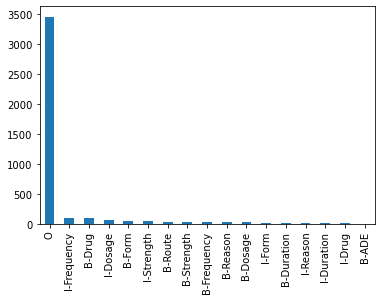

In [13]:
ann_tokens_df["entity"].value_counts().plot.bar()

In [14]:
ann_tokens = df_to_namedtuples(name="Annotation", df=ann_tokens_df)
ann_tokens[:4]

[Annotation(doc_id='100035', token='Admission', start_idx=0, end_idx=9, entity='O'),
 Annotation(doc_id='100035', token='Date', start_idx=10, end_idx=14, entity='O'),
 Annotation(doc_id='100035', token=':', start_idx=14, end_idx=15, entity='O'),
 Annotation(doc_id='100035', token='[', start_idx=17, end_idx=18, entity='O')]

In [18]:
seqs = split_annotated_tokens_in_batches(ann_tokens, seq_length=234)
[len(seq) for seq in seqs]

[234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 234,
 231,
 234,
 234,
 234,
 9]

In [20]:
seqs[0][:10]

[Annotation(doc_id='100035', token='Admission', start_idx=0, end_idx=9, entity='O'),
 Annotation(doc_id='100035', token='Date', start_idx=10, end_idx=14, entity='O'),
 Annotation(doc_id='100035', token=':', start_idx=14, end_idx=15, entity='O'),
 Annotation(doc_id='100035', token='[', start_idx=17, end_idx=18, entity='O'),
 Annotation(doc_id='100035', token='*', start_idx=18, end_idx=19, entity='O'),
 Annotation(doc_id='100035', token='*', start_idx=19, end_idx=20, entity='O'),
 Annotation(doc_id='100035', token='2115-2-22', start_idx=20, end_idx=29, entity='O'),
 Annotation(doc_id='100035', token='*', start_idx=29, end_idx=30, entity='O'),
 Annotation(doc_id='100035', token='*', start_idx=30, end_idx=31, entity='O'),
 Annotation(doc_id='100035', token=']', start_idx=31, end_idx=32, entity='O')]

In [10]:
# import spacy
# from spacy import displacy

# for i, (start, end) in enumerate(para_start_indexes3):
#     print(f"{'='*50}{i}{'='*50}")
#     window = 10
#     idx = (end - start + 2*window)//2
    
#     string = text[start-window:end+window]
    
#     ex = [{"text": string, 
#        "ents": [{"start": idx-1, "end": idx+1, "label": "O"}],
#        "title": None}]
#     html = displacy.render(ex, style="ent", manual=True)